In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [75]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [76]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [79]:
df.shape

(1599, 12)

In [80]:
df.duplicated().sum()

240

In [81]:
for i in df:
    print(i + ':')
    print(df[i].value_counts())

fixed acidity:
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
volatile acidity:
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
citric acid:
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
residual sugar:
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
chlorides:
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
free sulfur dioxide:
6.0     138
5.0 

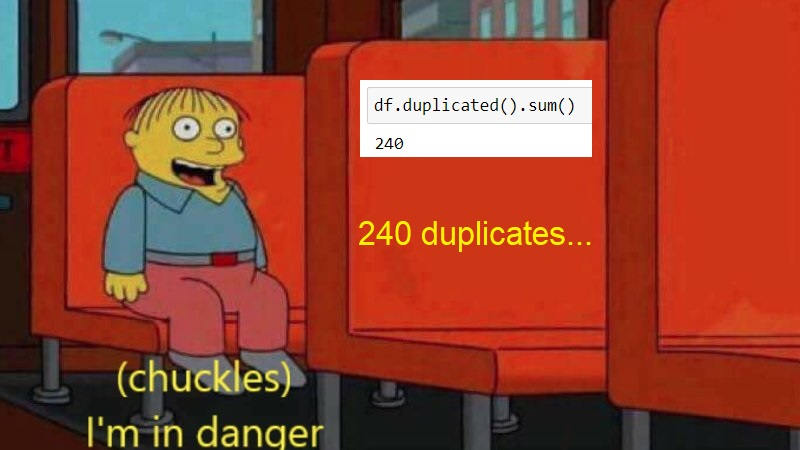

In [82]:
df = df.drop_duplicates(keep='first')
df.shape

(1359, 12)

In [83]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


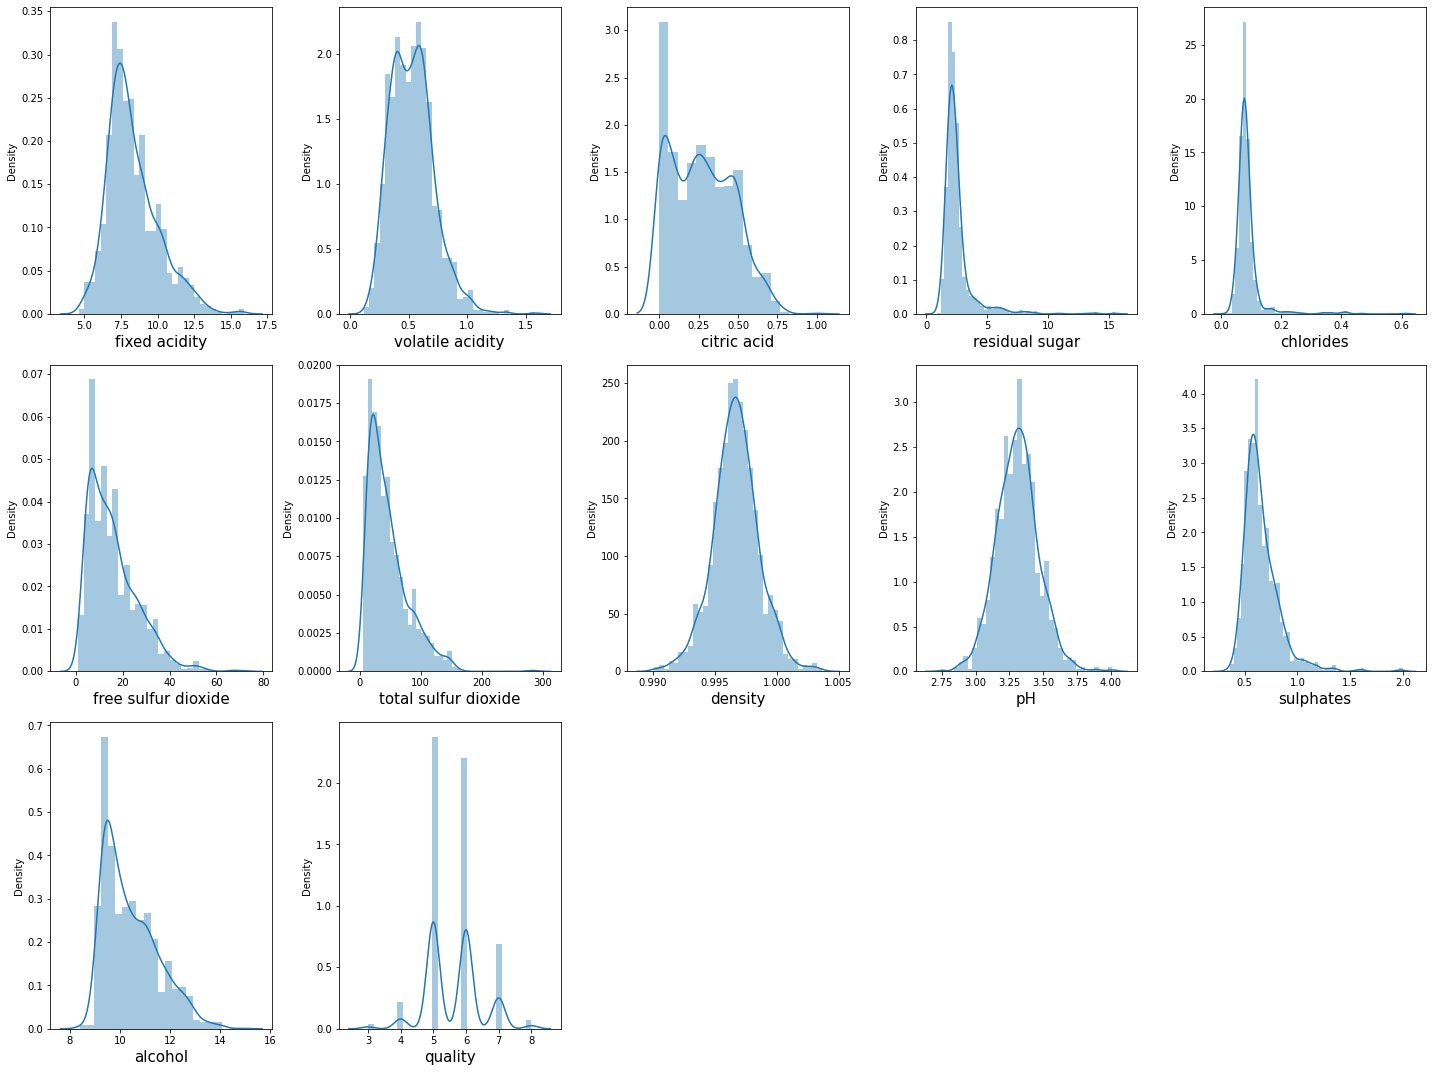

In [84]:
# Let's see how data is distributed for every column
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

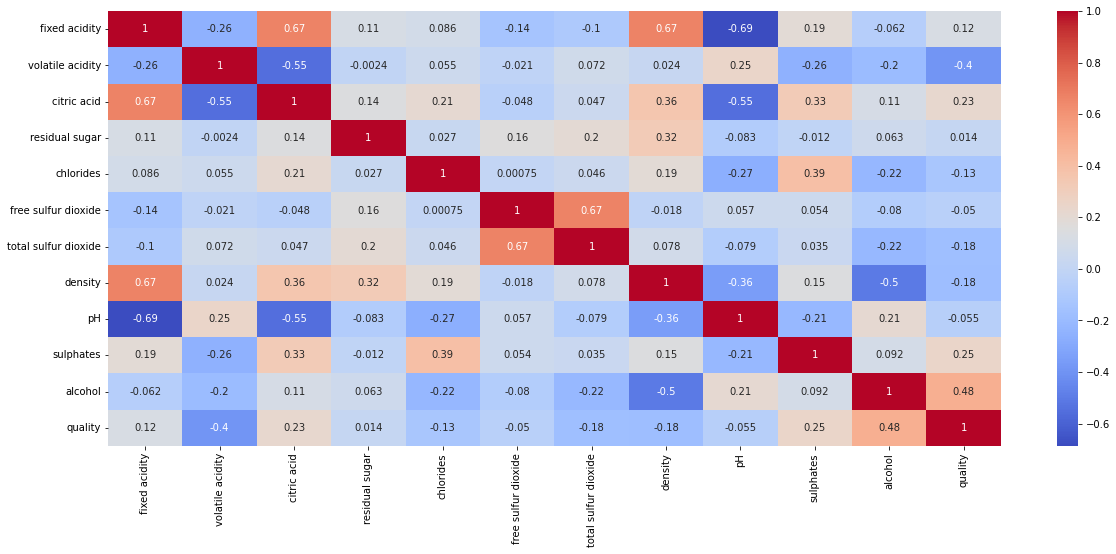

In [85]:
# correlation using heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

# Models

In [86]:
X = df.drop("quality", axis = 1)
y = df["quality"]

## Logistic Regression on different columns

In [87]:
def log_reg(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    score = lr.score(X_test, y_test)
    return score 

In [88]:
log_reg(X, y)

0.5411764705882353

### p-value Selector

In [89]:
from kydavra import PValueSelector
pv_s = PValueSelector()
selected_cols = pv_s.select(df, 'quality')
selected_cols

['volatile acidity',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [90]:
X = df[selected_cols]
log_reg(X, y)

0.5647058823529412

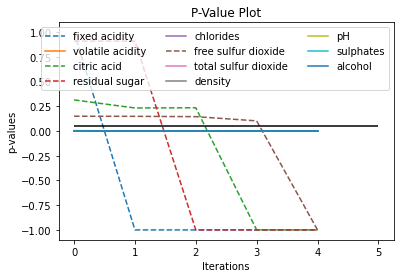

In [91]:
pv_s.plot_process()

### Genetic Algorithm Selector

In [92]:
from kydavra import GeneticAlgorithmSelector
gen_sel = GeneticAlgorithmSelector()
logreg = LogisticRegression()
selected_columns = gen_sel.select(logreg, df, 'quality')
selected_columns

['volatile acidity',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates']

In [93]:
X = df[selected_columns]
log_reg(X, y)

0.5205882352941177

### Pearson Correlation Selector

In [94]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(df, 'quality')
selected_columns

[]

In [95]:
pearson = PearsonCorrelationSelector(min_corr=0.35)
selected_columns = pearson.select(df, 'quality')
selected_columns

['volatile acidity', 'alcohol']

In [96]:
X = df[selected_columns]
log_reg(X, y)

0.5735294117647058

### LDA Reducer

In [97]:
from kydavra import LDAReducer
lda = LDAReducer()
selected_columns = lda.reduce(df, 'quality')
selected_columns.columns

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol',
       'quality', 'citric acid_density_fixed acidity_pH'],
      dtype='object')

In [98]:
X = selected_columns.drop('quality', axis = 1)
log_reg(X, y)

0.5852941176470589

### Mixer Selector

In [99]:
from kydavra import MixerSelector
from kydavra import ChiSquaredSelector

In [100]:
# intersection
intersect_mix = MixerSelector([PValueSelector(), ChiSquaredSelector(), PearsonCorrelationSelector(min_corr=0.4)], strategy='intersection')
selected_columns = intersect_mix.select(df, 'quality')
selected_columns

['alcohol']

In [101]:
X = df[selected_columns]
log_reg(X, y)

0.5205882352941177

In [102]:
# union
union_mix = MixerSelector([PValueSelector(), ChiSquaredSelector(), PearsonCorrelationSelector(min_corr=0.4)], strategy='union')
selected_columns = union_mix.select(df, 'quality')
selected_columns

['free sulfur dioxide',
 'volatile acidity',
 'density',
 'total sulfur dioxide',
 'pH',
 'alcohol',
 'chlorides',
 'sulphates']

In [103]:
X = df[selected_columns]
log_reg(X, y)

0.5852941176470589

### LASSO Selector

In [104]:
from kydavra import LassoSelector
selector = LassoSelector()
selected_cols = selector.select(df, 'quality')
selected_cols

['volatile acidity', 'citric acid', 'chlorides', 'pH', 'sulphates', 'alcohol']

In [105]:
X = df[selected_columns]
log_reg(X, y)

0.5794117647058824

### Point Biseral Correlation Selector

In [106]:
from kydavra import PointBiserialCorrSelector
point_biseral = PointBiserialCorrSelector()
selected_cols = point_biseral.select(df, 'quality')
selected_cols

['total sulfur dioxide', 'alcohol', 'volatile acidity', 'density', 'sulphates']

In [107]:
X = df[selected_columns]
log_reg(X, y)

0.5764705882352941

### Top of Results:       
    1. Logistic Regression = 0.611764705882353   
    2. Point Biseral Correlation Selector = 0.6 
    3. Mixer Selector (union) = 0.5647058823529412
    4. p-value Selector = 0.5588235294117647  
    5. Pearson Correlation = 0.5529411764705883 
    6. LASSO Selector = 0.5470588235294118 
    7. Genetic Algorithm = 0.5352941176470588   
    8. Mixer Selector (intersection) = 0.5235294117647059  
    9. LDA Reducer = 0.5029411764705882

# Going back to our data, let's play with it 

In [108]:
df = pd.read_csv('winequality-red.csv')
df = df.drop_duplicates(keep='first')
df.shape

(1359, 12)

## Compare the effect of different scalers on data with outliers

### Standard Scaler
Standard Scaler follows the Standard Normal Distribution, i.e., it assumes a normal distribution for data within each feature. The scaling makes the distribution centered around 0, with a standard deviation of 1 and the mean removed

In [109]:
from sklearn.preprocessing import StandardScaler
X = df.drop("quality", axis = 1)
X = StandardScaler().fit_transform(X)
y = df["quality"]
log_reg(X, y)

0.55

### Min Max Scaler
   MinMax Scaler is one of the most popular scaling algorithms. It transforms features by scaling each feature to a given range, which is generally [0,1], or [-1,-1] in case of negative values.    
   It subtracts the mean of the column from each value and then divides by the range, i.e, max(x)-min(x).   
   This scaling algorithm works very well in cases where the standard deviation is very small, or in cases which don’t have Gaussian distribution.

In [110]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop("quality", axis = 1)
X = MinMaxScaler().fit_transform(X)
y = df["quality"]
log_reg(X, y)

0.5647058823529412

## Max Abs Scaler
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [111]:
from sklearn.preprocessing import MaxAbsScaler
df = pd.read_csv('winequality-red.csv')
df = df.drop_duplicates(keep='first')
X = df.drop("quality", axis = 1)
X = MaxAbsScaler().fit_transform(X)
y = df["quality"]
log_reg(X, y)

0.5852941176470589

## Robust Scaler
Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range. The quantile range is by default IQR (Interquartile Range, quantile range between the 1st quartile = 25th quantile and the 3rd quartile = 75th quantile) but can be configured. 

In [112]:
from sklearn.preprocessing import RobustScaler
df = pd.read_csv('winequality-red.csv')
df = df.drop_duplicates(keep='first')
X = df.drop("quality", axis = 1)
X = RobustScaler().fit_transform(X)
y = df["quality"]
log_reg(X, y)

0.5705882352941176

In [128]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause
import matplotlib as mpl
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


dataset = pd.read_csv("winequality-red.csv").drop_duplicates(keep='first')
X_full = dataset.drop("quality", axis = 1).to_numpy()

y_full = dataset["quality"].to_numpy()
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

feature_mapping = {
    "fixed acidity": "most acids involved with wine or fixed or nonvolatile",
    "volatile acidity": "the amount of acetic acid in wine",
    "citric acid": "found in small quantities, adds 'freshness' and flavor to wines",
    "residual sugar": "the amount of sugar remaining after fermentation stops",
    "chlorides": "the amount of salt in the wine",
    "free sulfur dioxide": "the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents",
    "total sulfur dioxide": "amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2",
    "density": "the density of water is close to that of water depending on the percent alcohol and sugar content",
    "pH":"describes how acidic or basic a wine is",
    "sulphates":"a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and",
    "alcohol":"the percent alcohol content of the wine",
    
}

# Take only 2 features to make visualization easier
# Feature MedInc has a long tail distribution.
# Feature AveOccup has a few but very large outliers.
features = ["volatile acidity", "alcohol"]
features_idx = [feature_names.index(feature) for feature in features]
X = X_full[:, features_idx]
distributions = [
    ("Unscaled data", X),
    ("Data after standard scaling", StandardScaler().fit_transform(X)),
    ("Data after min-max scaling", MinMaxScaler().fit_transform(X)),
    ("Data after max-abs scaling", MaxAbsScaler().fit_transform(X)),
    (
        "Data after robust scaling",
        RobustScaler().fit_transform(X),
    ),
    (
        "Data after power transformation (Yeo-Johnson)",
        PowerTransformer(method="yeo-johnson").fit_transform(X),
    ),
    (
        "Data after power transformation (Box-Cox)",
        PowerTransformer(method="box-cox").fit_transform(X),
    ),
    (
        "Data after quantile transformation (uniform)",
        QuantileTransformer(output_distribution="uniform").fit_transform(X),
    ),
    (
        "Data after quantile transformation (gaussian)",
        QuantileTransformer(output_distribution="normal").fit_transform(X),
    ),
    ("Data after sample-wise L2 normalizing", Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, "plasma_r", cm.hot_r)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return (
        (ax_scatter, ax_histy, ax_histx),
        (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
        ax_colorbar,
    )


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker="o", s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(
        X[:, 1], bins=hist_nbins, orientation="horizontal", color="grey", ec="grey"
    )
    hist_X1.axis("off")

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(
        X[:, 0], bins=hist_nbins, orientation="vertical", color="grey", ec="grey"
    )
    hist_X0.axis("off")

In [129]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(
        axarr[0],
        X,
        y,
        hist_nbins=200,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Full data",
    )

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) & np.all(
        X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1
    )
    plot_distribution(
        axarr[1],
        X[non_outliers_mask],
        y[non_outliers_mask],
        hist_nbins=50,
        x0_label=feature_mapping[features[0]],
        x1_label=feature_mapping[features[1]],
        title="Zoom-in",
    )

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(
        ax_colorbar,
        cmap=cmap,
        norm=norm,
        orientation="vertical",
        label="Color mapping for values of y",
    )

### Unscaled data 
x-axis: Volatile acidity   
y-axis: alcohol

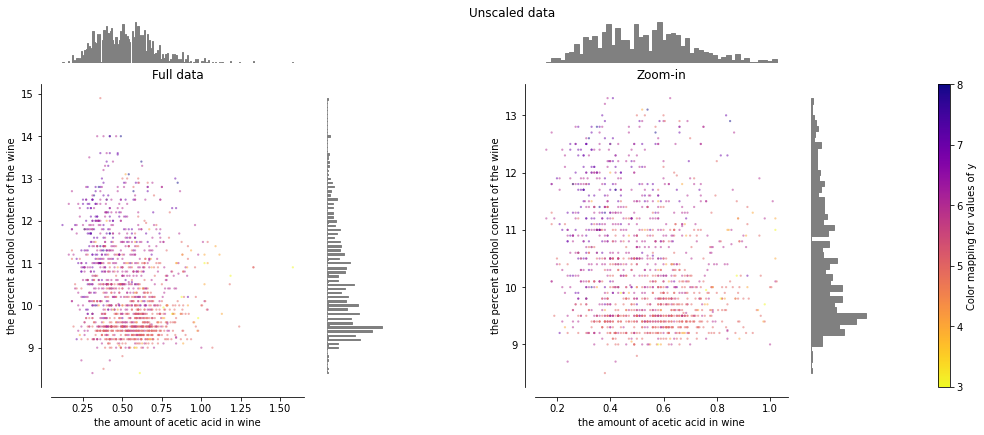

In [130]:
make_plot(0)

### Standard Scaler
Standard Scaler follows the Standard Normal Distribution, i.e., it assumes a normal distribution for data within each feature. The scaling makes the distribution centered around 0, with a standard deviation of 1 and the mean removed

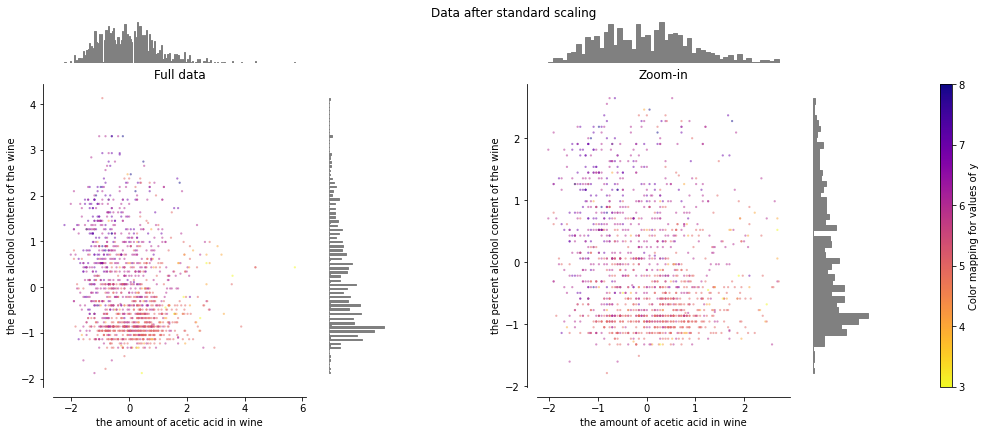

In [131]:
make_plot(1)

### Min Max Scaler
   MinMax Scaler is one of the most popular scaling algorithms. It transforms features by scaling each feature to a given range, which is generally [0,1], or [-1,-1] in case of negative values.    
   It subtracts the mean of the column from each value and then divides by the range, i.e, max(x)-min(x).   
   This scaling algorithm works very well in cases where the standard deviation is very small, or in cases which don’t have Gaussian distribution.

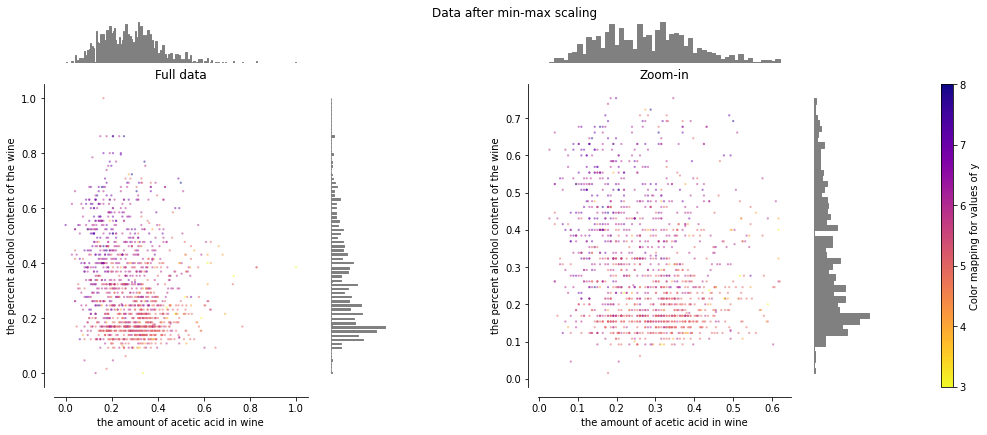

In [132]:
make_plot(2)

## Max Abs Scaler
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

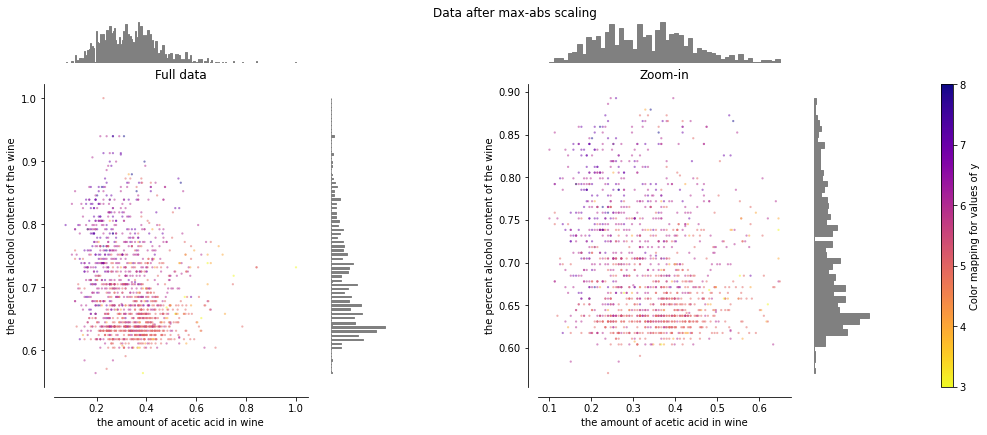

In [133]:
make_plot(3)

## Robust Scaler
Robust Scaler algorithms scale features that are robust to outliers. The method it follows is almost similar to the MinMax Scaler but it uses the interquartile range (rather than the min-max used in MinMax Scaler). The median and scales of the data are removed by this scaling algorithm according to the quantile range. The quantile range is by default IQR (Interquartile Range, quantile range between the 1st quartile = 25th quantile and the 3rd quartile = 75th quantile) but can be configured. 

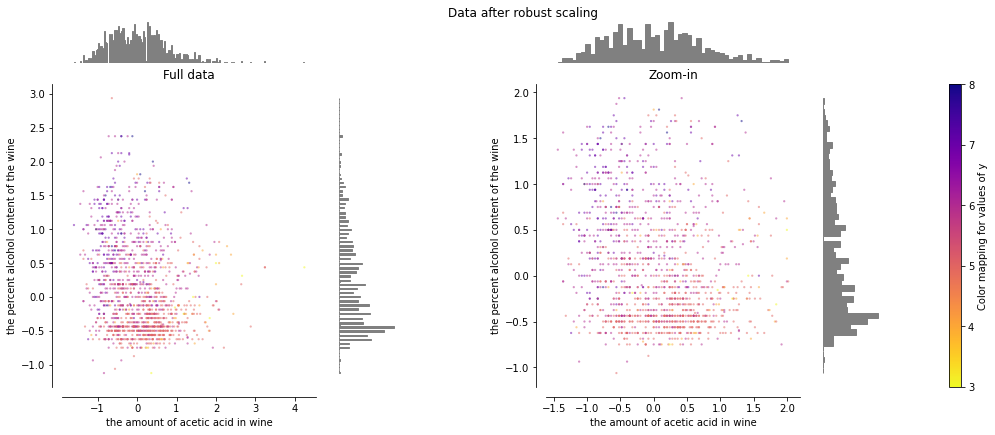

In [134]:
make_plot(4)

### Power Transformation (Yeo-Johnson)
Power trasnformation that does not require the values for each input variable to be strictly positive. It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

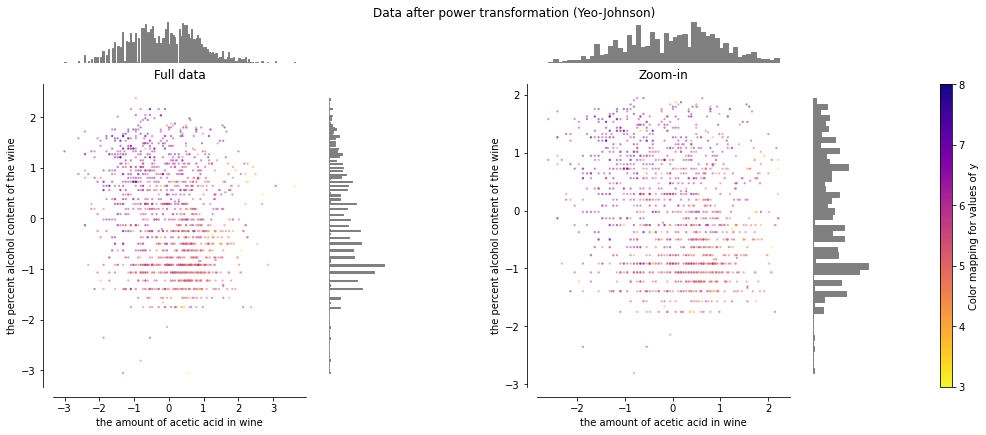

In [135]:
make_plot(5)

### Power Transformation (Box-Cox)
It is a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported.

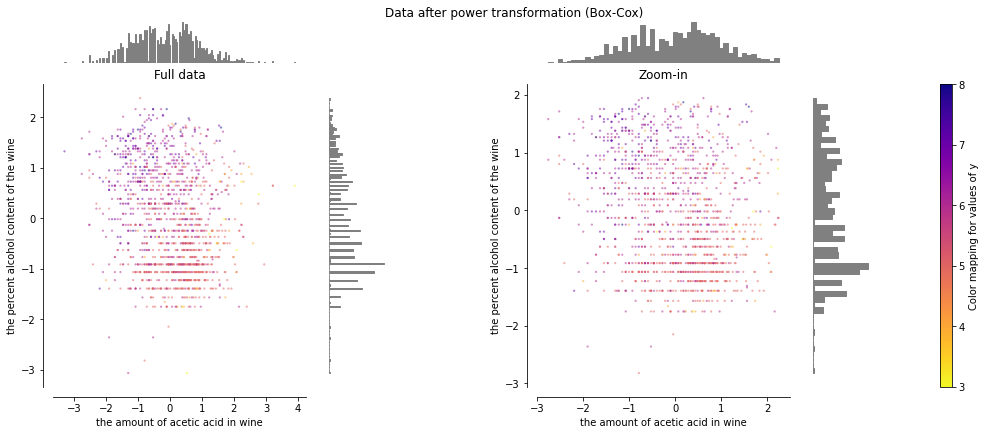

In [136]:
make_plot(6)

### Quantile Transformer (Uniform)
A technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution.  
This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare.

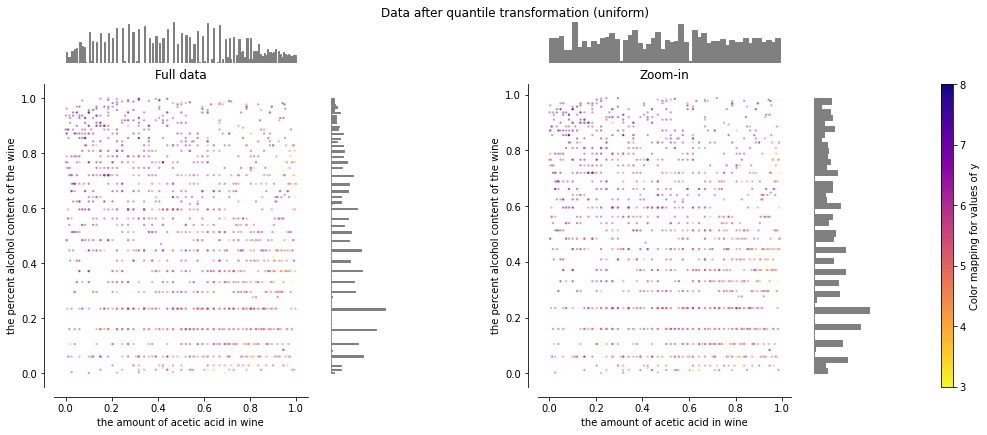

In [137]:
make_plot(7)

### Quantile Transformer (Gaussian)
A technique for transforming numerical input or output variables to have a Gaussian distribution.


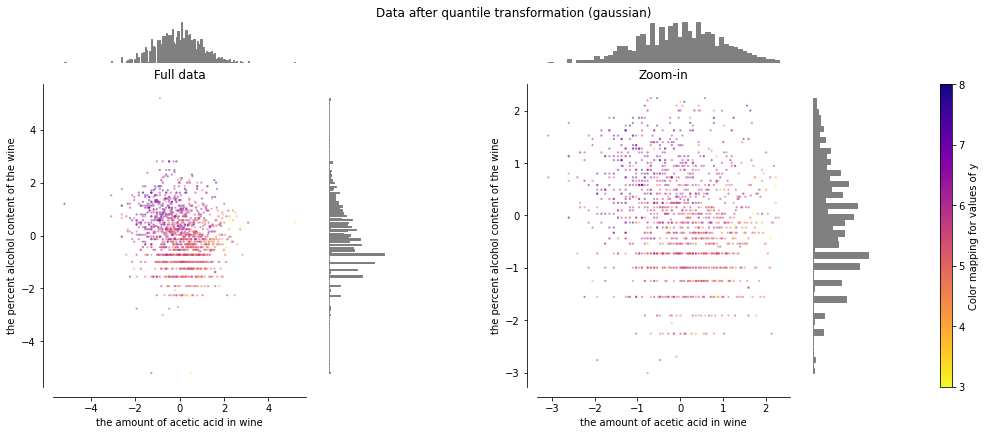

In [138]:
make_plot(8)


### L2 Normalizer

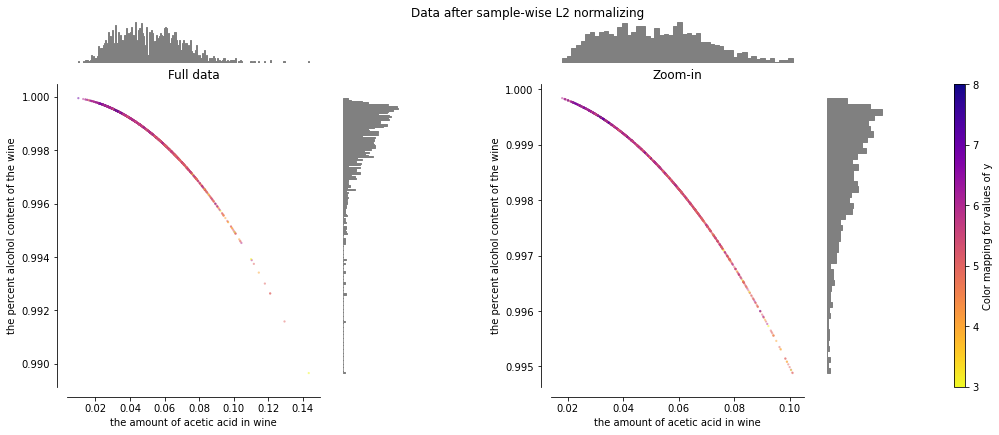

In [127]:
make_plot(9)
